# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [883]:
# TODO: Import all necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures,StandardScaler,MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)




# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [884]:
# upload the required dataset into my github then access the dataset and load it into df.
df=pd.read_csv("https://raw.githubusercontent.com/asadaladil/Others-Materials/refs/heads/main/insurance.csv")
print(df.shape)
print(df.columns)

target_variable='charges'

df.head(10)

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


- Explanation:
- The given dataset consists of 1338 rows and 7 columns. The features that are included is shown using df.columns method. The target variable is 'charges'. As it is a regression problem, it will the charges based on the training dataset.

## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


In [885]:
# TODO: Perform EDA
print(df.isnull().sum())
df.describe()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


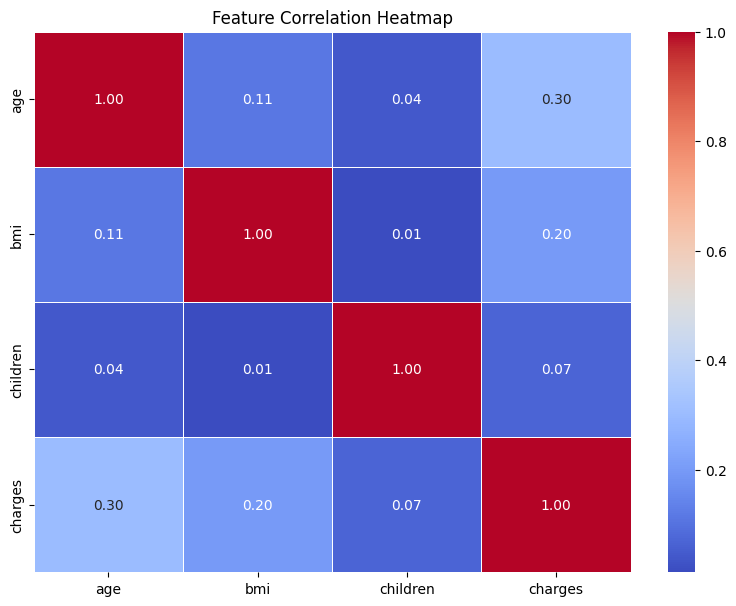

In [886]:
# correlation heatmap

numerical_col=['age','bmi','children','charges']
categorical_col=['sex','smoker','region']
correlation_matrix=df[numerical_col].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.tight_layout()
plt.title("Feature Correlation Heatmap")
plt.show()

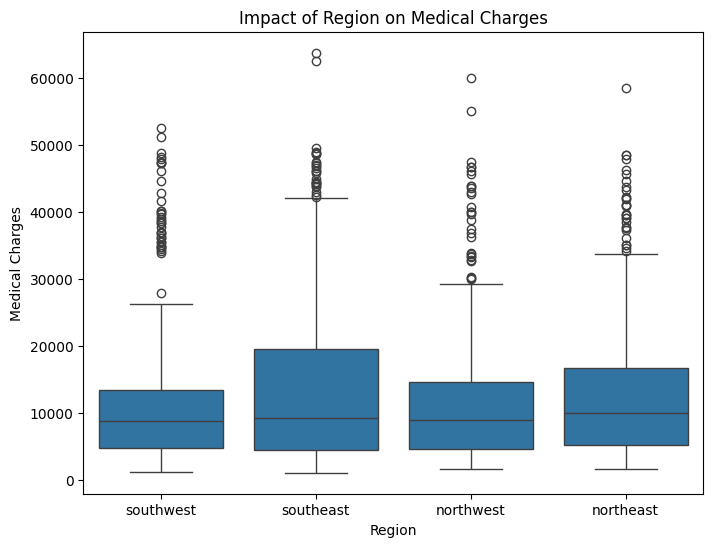

In [887]:

plt.figure(figsize=(8,6))
sns.boxplot(x='region', y='charges', data=df)
plt.title("Impact of Region on Medical Charges")
plt.xlabel("Region")
plt.ylabel("Medical Charges")
plt.show()

In [888]:
# one hot encoding for categorical feature:
df_encoded=pd.get_dummies(df, columns=categorical_col, dtype=int)
df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [889]:
# TODO: Prepare features
X=df_encoded.drop(columns=[target_variable])
y=df_encoded[target_variable]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

- Explanation
- Here i have done one-hot encoding for the categorical dataset. then split the dataset into 80% training and 20% testing. now we have to fit it into the multiple linear regression model.

## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [890]:
# TODO: Multiple Linear Regression
mul_lin_reg=LinearRegression()
mul_lin_reg.fit(X_train,y_train)
y_pred=mul_lin_reg.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

MSE: 33596915.85
RMSE: 5796.28
MAE: 4181.19
R2: 0.78


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [891]:
# TODO: Polynomial Regression

for i in range(1,5):
  poly=PolynomialFeatures(degree=i,include_bias=False)
  X_train_poly=poly.fit_transform(X_train)
  X_test_poly=poly.transform(X_test)

  model=LinearRegression()
  model.fit(X_train_poly,y_train)
  y_pred_2=model.predict(X_test_poly)

  mse2=mean_squared_error(y_test,y_pred_2)
  rmse2=np.sqrt(mse2)
  mae2=mean_absolute_error(y_test,y_pred_2)
  r2_2=r2_score(y_test,y_pred_2)
  print(f"Degree: {i}")
  if i==1:
    print("Linear Regression\n")
  print(f"MSE: {mse2:.2f}")
  print(f"RMSE: {rmse2:.2f}")
  print(f"MAE: {mae2:.2f}")
  print(f"R2: {r2_2:.2f}\n\n")

Degree: 1
Linear Regression

MSE: 33596915.85
RMSE: 5796.28
MAE: 4181.19
R2: 0.78


Degree: 2
MSE: 20712805.99
RMSE: 4551.13
MAE: 2729.50
R2: 0.87


Degree: 3
MSE: 23498218.00
RMSE: 4847.50
MAE: 2937.92
R2: 0.85


Degree: 4
MSE: 38158498.31
RMSE: 6177.26
MAE: 3529.08
R2: 0.75




After exploring the r2 and other value it can be easily determined that polynomial degree 2 reflects the best result amonng other degrees and it is also better than linear regression in comparsion.

## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [892]:
# TODO: Support Vector Regression
kernel=['linear','poly','rbf','sigmoid'] #with regularization c=100

# without scaling
scale=StandardScaler()
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.transform(X_test)


for i in kernel:
  model=SVR(kernel=i,C=100,gamma='scale',epsilon=0.1)
  model.fit(X_train_scale,y_train)
  y_pred=model.predict(X_test_scale)

  mse=mean_squared_error(y_test,y_pred)
  rmse=np.sqrt(mse)
  mae=mean_absolute_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)

  print(f"Kernel: {i}")
  print(f"MSE: {mse:.2f}")
  print(f"RMSE: {rmse:.2f}")
  print(f"MAE: {mae:.2f}")
  print(f"R2: {r2:.2f}\n\n")

model=SVR(kernel='rbf',C=1000,gamma='scale',epsilon=0.1) # with regularization c=1000
model.fit(X_train_scale,y_train)
y_pred=model.predict(X_test_scale)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Kernel: rbf C=1000")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}\n\n")

Kernel: linear
MSE: 37593014.54
RMSE: 6131.31
MAE: 3324.15
R2: 0.76


Kernel: poly
MSE: 66144626.90
RMSE: 8132.93
MAE: 5043.72
R2: 0.57


Kernel: rbf
MSE: 103218181.60
RMSE: 10159.63
MAE: 5698.83
R2: 0.34


Kernel: sigmoid
MSE: 71179817.30
RMSE: 8436.81
MAE: 3995.85
R2: 0.54


Kernel: rbf C=1000
MSE: 35470760.30
RMSE: 5955.73
MAE: 2724.97
R2: 0.77




- Justification
- The tuned RBF kernel achieved the highest accuracy with R2 score of 0.7715 and the lowest RMSE: 5955. This indicates it explains the variance in medical charges better than the Linear, Polynomial, or Sigmoid kernels. So, The regularization(C) value plays a vital role in training models.

## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [893]:
# TODO: Random Forest Regressor
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

MSE: 21051837.12
RMSE: 4588.23
MAE: 2548.53
R2: 0.86


# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [894]:
# TODO: Load classification dataset
df=pd.read_csv("https://raw.githubusercontent.com/asadaladil/Others-Materials/refs/heads/main/loan_data.csv")

print(df['loan_status'].value_counts())

df.head()

loan_status
0    35000
1    10000
Name: count, dtype: int64


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


There is significant class imbalance. Approximately 80% is acquired by a class. So, there might be a chance to model become biased on '0' level classes.

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


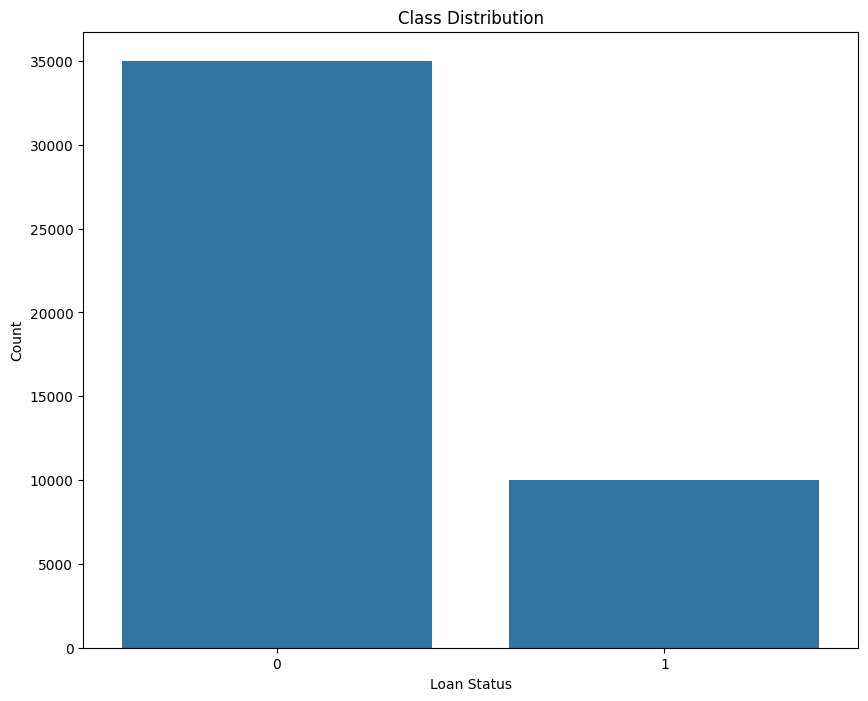

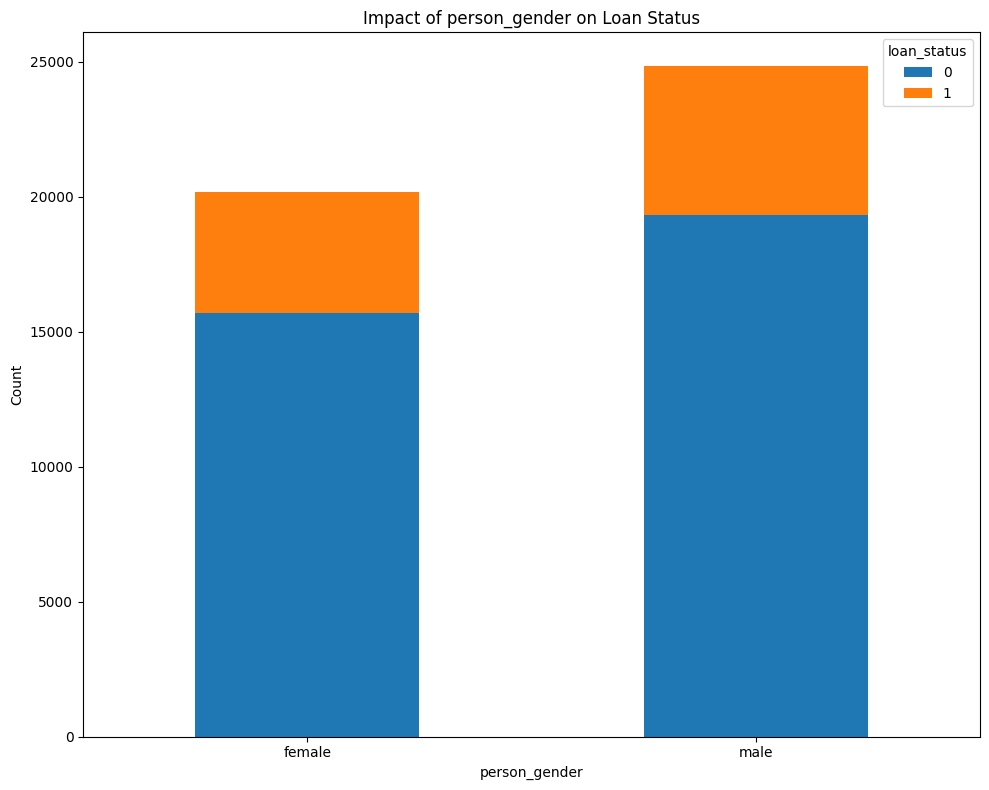

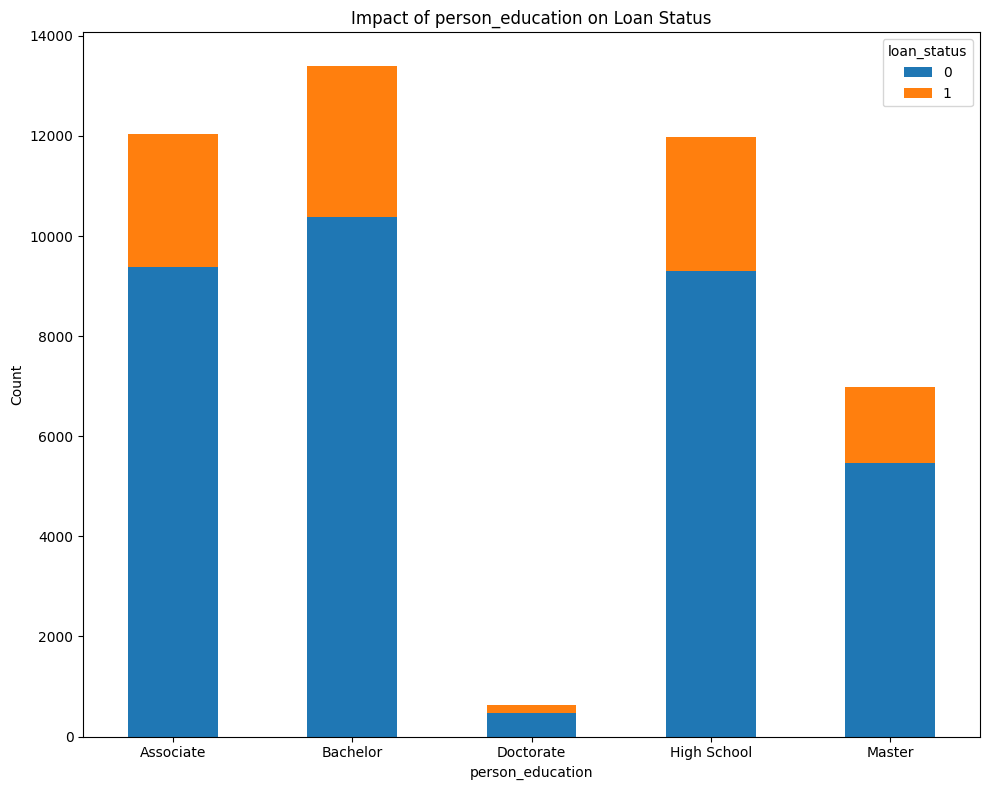

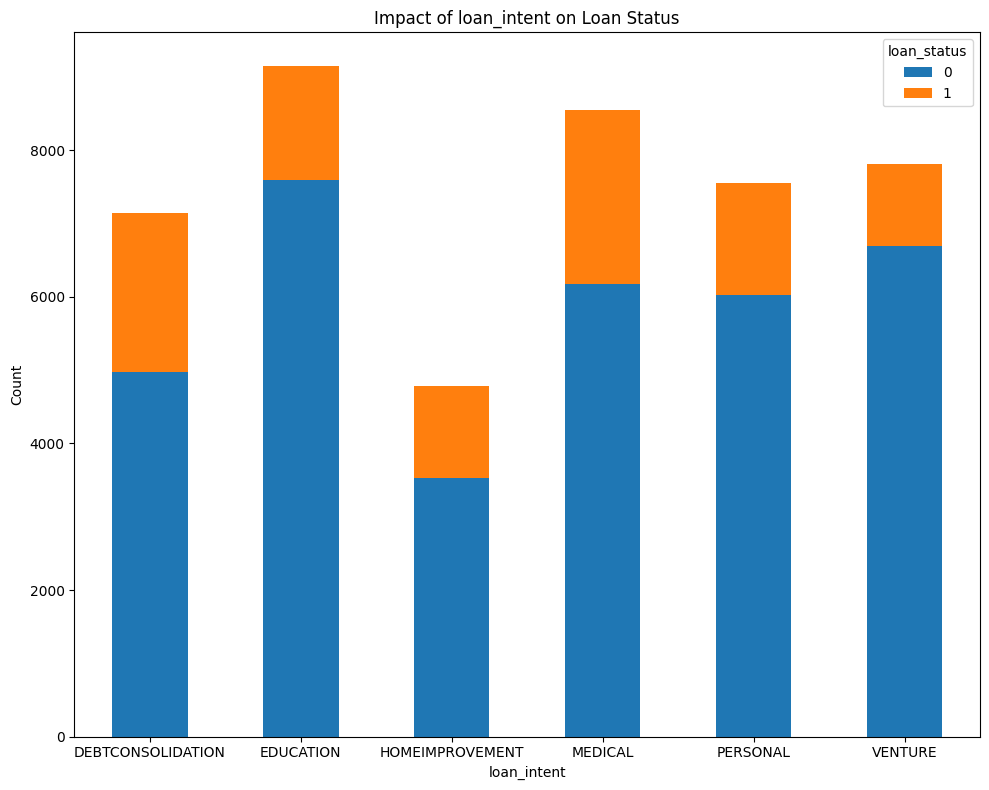

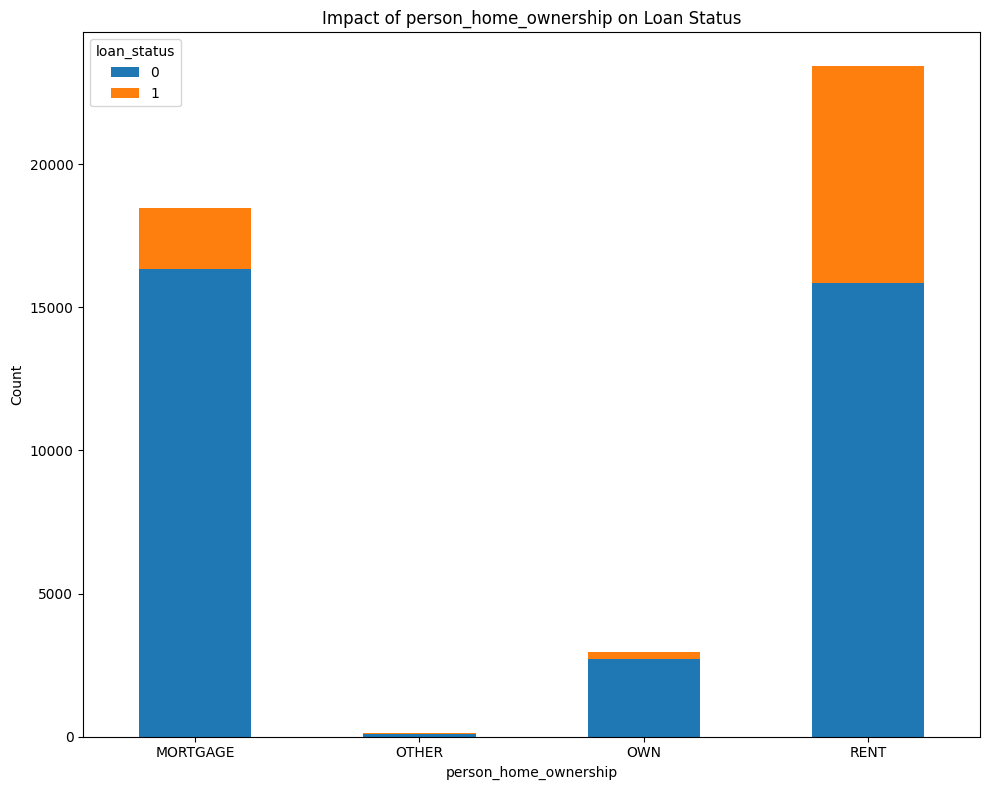

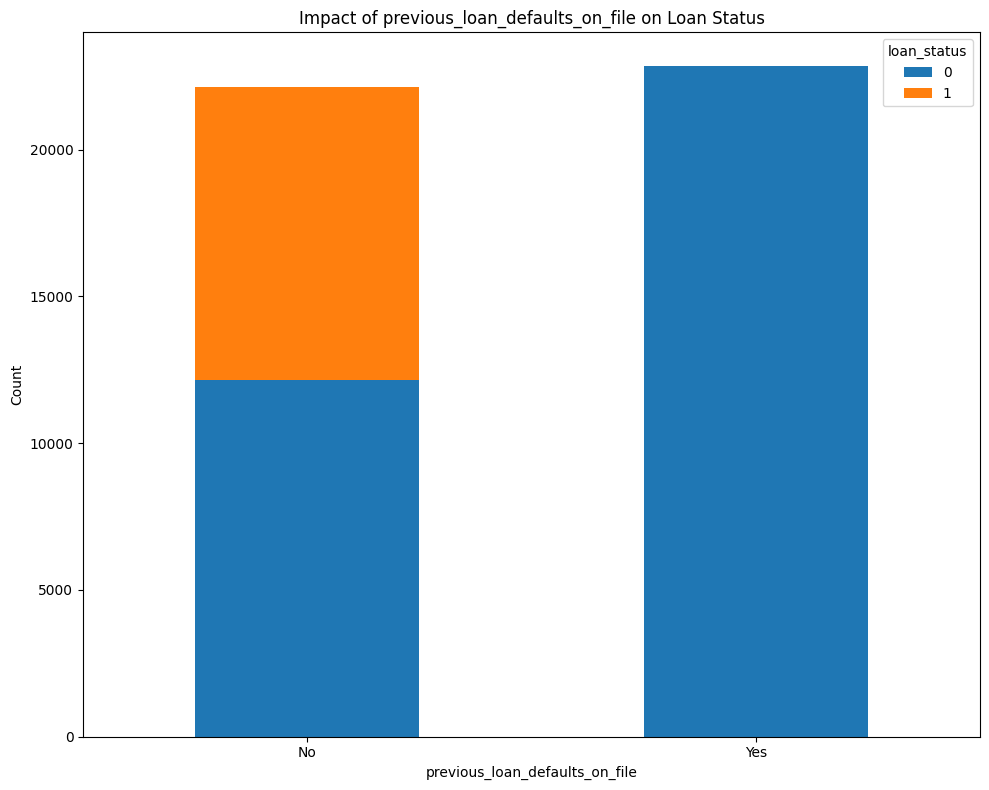

In [895]:
# TODO: Classification EDA

plt.figure(figsize=(10,8))
sns.countplot(x='loan_status', data=df)
plt.title("Class Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

categorical_col=['person_gender','person_education','loan_intent','person_home_ownership','previous_loan_defaults_on_file']
for c in categorical_col:
  ct=pd.crosstab(df[c],df['loan_status'])
  ct.plot(kind='bar',stacked=True,figsize=(10,8))
  plt.title(f"Impact of {c} on Loan Status")
  plt.xlabel(c)
  plt.ylabel("Count")
  plt.xticks(rotation=0)
  plt.tight_layout()

plt.show()



## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [896]:
# TODO: Prepare classification features
df_encoded=pd.get_dummies(df, columns=categorical_col,dtype=int)
#df_encoded.head()

X=df_encoded.drop(columns=['loan_status'])
y=df_encoded['loan_status']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print(y_train.value_counts())
print(y_test.value_counts())

scale=StandardScaler()
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.transform(X_test)

loan_status
0    28000
1     8000
Name: count, dtype: int64
loan_status
0    7000
1    2000
Name: count, dtype: int64


## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


In [897]:
# TODO: Logistic Regression
log_reg=LogisticRegression()
log_reg.fit(X_train_scale,y_train)
y_pred=log_reg.predict(X_test_scale)

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

c_m=confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix:")
print(c_m)

print("\nClassification Report:")
print(classification_report(y_test,y_pred))

Accuracy: 0.90
Precision: 0.79
Recall: 0.75

Confusion Matrix:
[[6600  400]
 [ 503 1497]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7000
           1       0.79      0.75      0.77      2000

    accuracy                           0.90      9000
   macro avg       0.86      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000



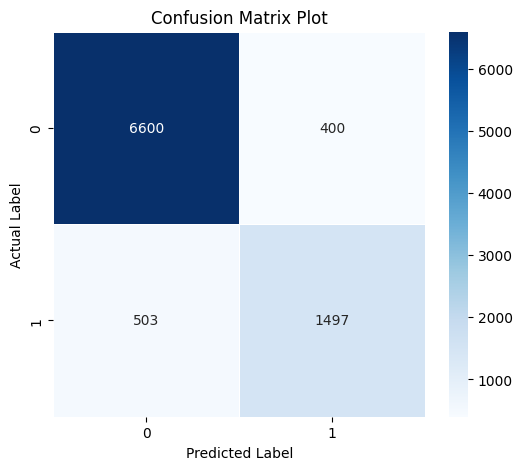

In [898]:
plt.figure(figsize=(6, 5))

sns.heatmap(c_m,annot=True,fmt='d',cmap='Blues', linewidths=0.5)

plt.title('Confusion Matrix Plot')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


Kernel: linear
Accuracy: 0.90
Precision: 0.79
Recall: 0.75


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7000
           1       0.79      0.75      0.77      2000

    accuracy                           0.90      9000
   macro avg       0.86      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000


Confusion Matrix:
[[6613  387]
 [ 509 1491]]




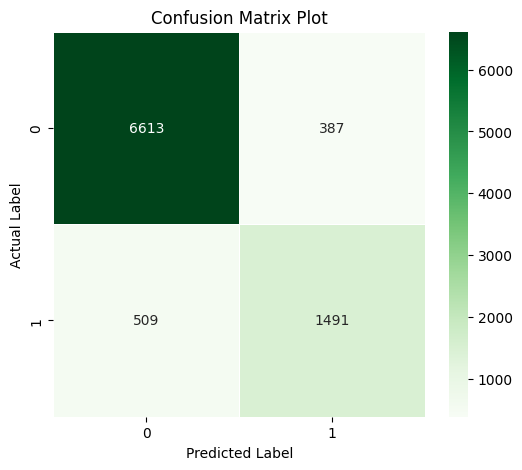


Kernel: rbf
Accuracy: 0.92
Precision: 0.85
Recall: 0.76


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7000
           1       0.85      0.76      0.80      2000

    accuracy                           0.92      9000
   macro avg       0.89      0.86      0.87      9000
weighted avg       0.91      0.92      0.91      9000


Confusion Matrix:
[[6726  274]
 [ 487 1513]]




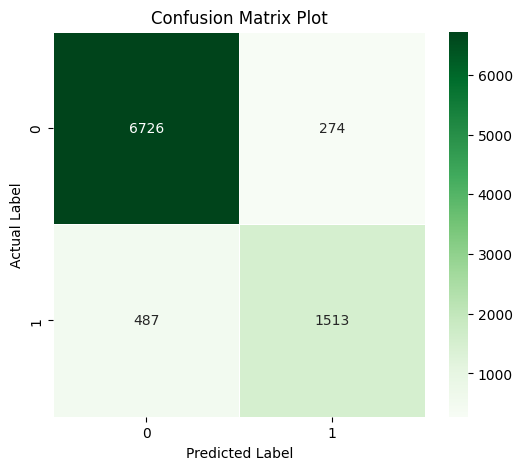

In [899]:
# TODO: SVM Classification
kernel=['linear','rbf']
for i in kernel:
  model=SVC(kernel=i,C=1.0,gamma='scale')
  model.fit(X_train_scale,y_train)
  y_pred=model.predict(X_test_scale)

  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred)

  print(f"Kernel: {i}")
  print(f"Accuracy: {accuracy:.2f}")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}\n")

  print("\nClassification Report:")
  print(classification_report(y_test,y_pred))

  c_m=confusion_matrix(y_test,y_pred)
  print("\nConfusion Matrix:")
  print(c_m)
  print("\n")
  plt.figure(figsize=(6, 5))

  sns.heatmap(c_m,annot=True,fmt='d',cmap='Greens', linewidths=0.5)

  plt.title('Confusion Matrix Plot')
  plt.xlabel('Predicted Label')
  plt.ylabel('Actual Label')
  plt.show()
  print()

## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



Accuracy: 0.84
Precision: 0.60
Recall: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7000
           1       0.60      0.85      0.70      2000

    accuracy                           0.84      9000
   macro avg       0.77      0.84      0.79      9000
weighted avg       0.87      0.84      0.85      9000


Confusion Matrix:
[[5849 1151]
 [ 302 1698]]


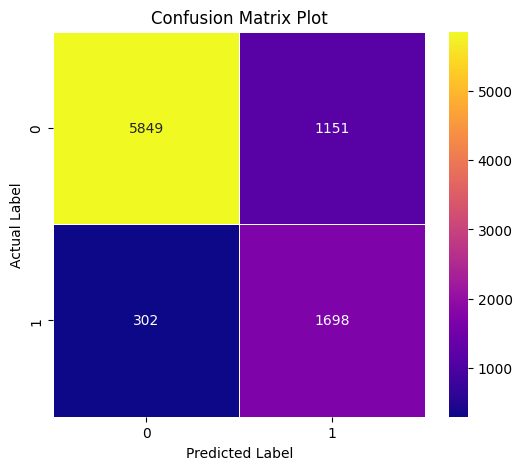

In [900]:
# TODO: Naive Bayes

gnb=BernoulliNB() # the target variable consists of binary features.
gnb.fit(X_train_scale,y_train)
y_pred=gnb.predict(X_test_scale)

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

print("\nClassification Report:")
print(classification_report(y_test,y_pred))

c_m=confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix:")
print(c_m)

plt.figure(figsize=(6,5))

sns.heatmap(c_m,annot=True,fmt='d',cmap='plasma',linewidths=0.5)

plt.title('Confusion Matrix Plot')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


n_neighbors: 5
Accuracy: 0.89
Precision: 0.79
Recall: 0.70

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7000
           1       0.79      0.70      0.74      2000

    accuracy                           0.89      9000
   macro avg       0.85      0.82      0.84      9000
weighted avg       0.89      0.89      0.89      9000


Confusion Matrix:
[[6634  366]
 [ 604 1396]]
n_neighbors: 6
Accuracy: 0.89
Precision: 0.85
Recall: 0.63

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7000
           1       0.85      0.63      0.72      2000

    accuracy                           0.89      9000
   macro avg       0.88      0.80      0.83      9000
weighted avg       0.89      0.89      0.89      9000


Confusion Matrix:
[[6785  215]
 [ 745 1255]]
n_neighbors: 7
Accuracy: 0.90
Precision: 0.81
Recall: 0.69

Classification Report:
     

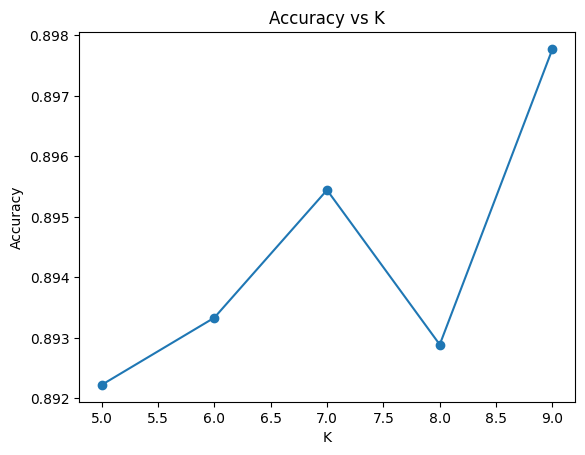

In [901]:
# TODO: KNN
neighbors=[5,6,7,8,9]
acc=[]

for i in neighbors:
  knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
  knn.fit(X_train_scale,y_train)
  y_pred=knn.predict(X_test_scale)

  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred)

  print(f"n_neighbors: {i}")
  print(f"Accuracy: {accuracy:.2f}")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  acc.append(accuracy)

  print("\nClassification Report:")
  print(classification_report(y_test,y_pred))

  c_m=confusion_matrix(y_test,y_pred)
  print("\nConfusion Matrix:")
  print(c_m)

plt.plot(neighbors,acc,marker='o')
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


In [902]:
# TODO: Random Forest Classifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

print("\nClassification Report:")
print(classification_report(y_test,y_pred))

c_m=confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix:")
print(c_m)

importances=pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(importances)

Accuracy: 0.93
Precision: 0.89
Recall: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7000
           1       0.89      0.77      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000


Confusion Matrix:
[[6812  188]
 [ 456 1544]]

Feature Importance:
loan_percent_income                   0.150063
loan_int_rate                         0.148650
previous_loan_defaults_on_file_No     0.128511
previous_loan_defaults_on_file_Yes    0.125528
person_income                         0.114747
loan_amnt                             0.056074
credit_score                          0.052817
person_home_ownership_RENT            0.036701
person_age                            0.029487
person_emp_exp                        0.027073
cb_person_cred_hist_length            0.024633
person_home_ownership

# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here
- Best regression model is Random Forest Regressor. As R2 scores display it properly.

- Best classification model is Random Forest Classifier. As Precision and F1 scores shows a positive review for the dataset.

- If i consider a real world scenerio based on classification, Burn detection classifier where we can classify 3 kinds of burn degrees.

- for regression a real world scenerio based on Stock Market Prediction on regular basis to predict the stock value of every product.
